# 시 추천 모델

In [1]:
import pandas as pd
import numpy as np

## 크롤링한 데이터 load
데이터 출처   
http://woorimal.net/   
http://raincat.com/   
https://twitter.com/poetrybot_kr?lang=ko

In [2]:
df = pd.read_csv('crawling_data.csv')

In [3]:
df

,제목,저자,본문,출처,연도
0,20년 후의 가을,곽재구,내 어릴 적 산골 학교 미술 시간에\n나는 푸른 크레용으로 옥토끼 모양 우리나라\n...,woorimal,1984
1,5월 화단,오일도,5월의 더딘 해 고요히 내리는 화단.\n하루의 정열도\n파김치 같이 시들다.\n바람...,raincat,1930
2,5월이 오면,김용호,무언가 속을 흐르는게 있다.\n가느다란 여울이 되어\n흐르는 것.\n\n이윽고 그것...,raincat,1960
3,6월의 시,김남조,어쩌면 미소짓는 물여울처럼 \n부는 바람일까 \n보리가 익어가는 보리밭 언저리에 \...,raincat,1971
4,가 정,박목월,지상에는\n아홉 켤레의 신발\n아니 현관에는 아니 들깐에는\n아니 어느 시인의 가정...,woorimal,1968
...,...,...,...,...,...
1264,흥부 부부상,박재삼,흥부 부부가 박덩이를 사이 하고\n가르기 전에 건넨 웃음살을 헤아려 보라.\n금이 ...,woorimal,1962
1265,희망,노천명,꽃술이 바람에 고개짓하고\n숲들 사뭇 우짖습니다\n\n그대가 오신다는 기별만 같아\...,raincat,1938
1266,희미한 옛사랑의 그림자,김광규,4 · 19가 나던 해 세밑\n우리는 오후 다섯 시에 만나\n반갑게 악수를 나누고\...,woorimal,1979
1267,흰 그림자,윤동주,황혼이 짙어지는 길 모금에서\n하루 종일 시들은 귀를 가만히 기울이면\n땅 검의 옮...,raincat,1944


## 시의 구조 데이터
총 길이, 연 수, 행 수, 평균 행 길이, 평균 단어 길이

In [4]:
df['총길이'] = df['본문'].str.len()
df["연 수"] = df['본문'].str.count("\n\n") + 1
df["행 수"] = df["본문"].str.count('\n') + 1
df.loc[df["연 수"] > 1, "행 수"] = df[df["연 수"] > 1]["행 수"] - df[df["연 수"] > 1]["연 수"] + 1

In [5]:
def avg_word_len(string):
    sum = 0
    arr = string.replace('\n', ' ').split(' ')
    arr = list(filter(lambda x: x, arr))
    
    for i in arr:
        sum += len(i)
        
    avg = sum/len(arr)
    return avg

In [6]:
def avg_sentence_len(string):
    sum = 0
    arr = string.split('\n')
    arr = list(filter(lambda x: x, arr))
    
    for i in arr:
        sum += len(i)
        
    avg = sum/len(arr)
    return avg

In [7]:
df['평균 행 길이'] = df['본문'].apply(avg_sentence_len)
df['평균 단어 길이'] = df['본문'].apply(avg_word_len)

In [8]:
df

,제목,저자,본문,출처,연도,총길이,연 수,행 수,평균 행 길이,평균 단어 길이
0,20년 후의 가을,곽재구,내 어릴 적 산골 학교 미술 시간에\n나는 푸른 크레용으로 옥토끼 모양 우리나라\n...,woorimal,1984,591,1,28,20.142857,2.654321
1,5월 화단,오일도,5월의 더딘 해 고요히 내리는 화단.\n하루의 정열도\n파김치 같이 시들다.\n바람...,raincat,1930,95,2,6,14.833333,2.653846
2,5월이 오면,김용호,무언가 속을 흐르는게 있다.\n가느다란 여울이 되어\n흐르는 것.\n\n이윽고 그것...,raincat,1960,194,4,14,12.714286,3.000000
3,6월의 시,김남조,어쩌면 미소짓는 물여울처럼 \n부는 바람일까 \n보리가 익어가는 보리밭 언저리에 \...,raincat,1971,279,5,18,14.333333,2.808824
4,가 정,박목월,지상에는\n아홉 켤레의 신발\n아니 현관에는 아니 들깐에는\n아니 어느 시인의 가정...,woorimal,1968,333,4,32,9.343750,2.719101
...,...,...,...,...,...,...,...,...,...,...
1264,흥부 부부상,박재삼,흥부 부부가 박덩이를 사이 하고\n가르기 전에 건넨 웃음살을 헤아려 보라.\n금이 ...,woorimal,1962,262,3,18,13.500000,2.895522
1265,희망,노천명,꽃술이 바람에 고개짓하고\n숲들 사뭇 우짖습니다\n\n그대가 오신다는 기별만 같아\...,raincat,1938,252,5,14,16.785714,3.016129
1266,희미한 옛사랑의 그림자,김광규,4 · 19가 나던 해 세밑\n우리는 오후 다섯 시에 만나\n반갑게 악수를 나누고\...,woorimal,1979,806,1,49,15.469388,2.879808
1267,흰 그림자,윤동주,황혼이 짙어지는 길 모금에서\n하루 종일 시들은 귀를 가만히 기울이면\n땅 검의 옮...,raincat,1944,289,4,18,14.944444,2.587500


## 시의 분위기 데이터
시의 감성을 positive, neutral, negative 수치를 통해 분류   
azure textanalytics - 별도의 파일에서 실행

In [ ]:
# !pip install azure-ai-textanalytics --pre

In [ ]:
arr=df['본문'].replace('\n', '. ', regex=True)
arr

In [ ]:
key = ""
endpoint = ""

In [ ]:
from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential

def authenticate_client():
    ta_credential = AzureKeyCredential(key)
    text_analytics_client = TextAnalyticsClient(
            endpoint=endpoint, 
            credential=ta_credential)
    return text_analytics_client

client = authenticate_client()

In [ ]:
def sentiment_analysis_with_opinion_mining_example(client):
    for i in range(len(arr)):
        documents = [arr[i]]

        result = client.analyze_sentiment(documents, show_opinion_mining=True)
        doc_result = [doc for doc in result if not doc.is_error]

        positive_reviews = [doc for doc in doc_result if doc.sentiment == "positive"]
        negative_reviews = [doc for doc in doc_result if doc.sentiment == "negative"]

        positive_mined_opinions = []
        mixed_mined_opinions = []
        negative_mined_opinions = []

        for document in doc_result:
            print(document.sentiment, '|', document.confidence_scores.positive, '|', document.confidence_scores.neutral, '|', document.confidence_scores.negative,
            )

In [ ]:
sentiment_analysis_with_opinion_mining_example(client)

positive | 0.58 | 0.37 | 0.05
positive | 0.6 | 0.22 | 0.18
positive | 0.56 | 0.37 | 0.07
neutral | 0.09 | 0.89 | 0.02
positive | 0.63 | 0.32 | 0.05
neutral | 0.1 | 0.86 | 0.04
positive | 0.55 | 0.4 | 0.05
positive | 0.6 | 0.34 | 0.06
mixed | 0.5 | 0.32 | 0.18
neutral | 0.13 | 0.84 | 0.03
neutral | 0.19 | 0.78 | 0.03
positive | 0.51 | 0.36 | 0.13
neutral | 0.09 | 0.89 | 0.02
neutral | 0.08 | 0.89 | 0.03
neutral | 0.08 | 0.88 | 0.04
neutral | 0.12 | 0.85 | 0.03
negative | 0.13 | 0.25 | 0.62
positive | 0.64 | 0.3 | 0.06
positive | 0.58 | 0.37 | 0.05
neutral | 0.12 | 0.85 | 0.03
neutral | 0.1 | 0.87 | 0.03
positive | 0.61 | 0.33 | 0.06
positive | 0.55 | 0.33 | 0.12
positive | 0.55 | 0.38 | 0.07
neutral | 0.14 | 0.83 | 0.03
positive | 0.47 | 0.43 | 0.1
positive | 0.54 | 0.4 | 0.06
neutral | 0.43 | 0.53 | 0.04
positive | 0.65 | 0.27 | 0.08
positive | 0.63 | 0.32 | 0.05
positive | 0.61 | 0.32 | 0.07
positive | 0.53 | 0.39 | 0.08
neutral | 0.13 | 0.83 | 0.04
positive | 0.58 | 0.37 | 0.05
neutr

## 시의 정보 데이터
발행 년도, 시인 인지도(네이버 검색어 트렌드)

In [9]:
import json
import urllib
from urllib import request
from datetime import datetime
from bs4 import BeautifulSoup

In [10]:
client_id = '7wMBNsWBQ6T7CamWtZ9N'
client_secret = 'LR3AirJhoO'
 
url = "https://openapi.naver.com/v1/datalab/search"

In [11]:
poets = df.저자.unique().tolist()
poets4 = [poets[i:i + 4] for i in range(0, len(poets), 4)]

In [12]:
df_searchTrend = pd.DataFrame(columns=['Name', 'Time', 'Trend_idx'])

In [13]:
def naver_poets4(lst):
    body = {"startDate":"2020-05-01",
        "endDate":"2021-04-30",
        "timeUnit":"month",
        "keywordGroups":[{"groupName":"기준점", "keywords":['네이버']}
                        ,{"groupName": lst[0], "keywords":[lst[0], '시인 {}'.format(lst[0])]}
                        ,{"groupName": lst[1], "keywords":[lst[1], '시인 {}'.format(lst[1])]}
                        ,{"groupName": lst[2], "keywords":[lst[2], '시인 {}'.format(lst[2])]}
                        ,{"groupName": lst[3], "keywords":[lst[3], '시인 {}'.format(lst[3])]}]} #5개까지 가능
    body = json.dumps(body, )
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    request.add_header("Content-Type","application/json")

    response = urllib.request.urlopen(request, data=body.encode("utf-8")) # 메서드로 크롤링할 웹페이지 가져옴
    rescode = response.getcode() #HTTP 응담 상태 코드
    if(rescode==200):
        response_body = response.read()
        scraped = response_body.decode('utf-8')
    else:
        print("Error Code:" + rescode)

    result = json.loads(scraped)
    df_5_results = pd.DataFrame(columns=['Name', 'Time', 'Trend_idx'])
    for idx in range(5):
        data = result['results'][idx]['data']
        name = result['results'][idx]['title']
        time = [pd.to_datetime(i['period']) for i in data]
        value = [i['ratio'] for i in data]
        data = pd.DataFrame({'Name':name, 'Time':time, 'Trend_idx': value})
        df_5_results = df_5_results.append(data)
    
    return df_5_results

In [14]:
len(poets4)

50

In [15]:
for i in range(49):
    df_searchTrend = df_searchTrend.append(naver_poets4(poets4[i]))

In [16]:
st_fin = df_searchTrend[df_searchTrend['Name'] != '기준점']
st_fin = st_fin.reset_index(drop=True)

In [17]:
trend = pd.DataFrame(st_fin.groupby('Name')['Trend_idx'].sum())
df = df.merge(trend, left_on = '저자', right_on = 'Name', how='outer')
df.iloc[1268, 8] = 0.362

In [18]:
# df.to_csv('data_cleaned_fin.csv', encoding='utf-8-sig', index=False)

## 감성별 주요 단어 시각화

In [19]:
df = pd.read_csv('data_cleaned_fin.csv')
df

,제목,저자,본문,출처,총길이,행 수,연 수,평균 단어 길이,평균 행 길이,sentiment,positive,neutral,negative,연도,trend_idx
0,20년 후의 가을,곽재구,내 어릴 적 산골 학교 미술 시간에\n나는 푸른 크레용으로 옥토끼 모양 우리나라\n...,woorimal,591,28,1,2.654321,20.142857,positive,0.57,0.36,0.07,1984,0.45805
1,5월 화단,오일도,5월의 더딘 해 고요히 내리는 화단.\n하루의 정열도\n파김치 같이 시들다.\n바람...,raincat,95,6,2,2.653846,14.833333,positive,0.53,0.29,0.18,1930,0.06988
2,5월이 오면,김용호,무언가 속을 흐르는게 있다.\n가느다란 여울이 되어\n흐르는 것.\n\n이윽고 그것...,raincat,194,14,4,3.000000,12.714286,positive,0.53,0.43,0.04,1960,91.40141
3,6월의 시,김남조,어쩌면 미소짓는 물여울처럼 \n부는 바람일까 \n보리가 익어가는 보리밭 언저리에 \...,raincat,279,18,5,2.808824,14.333333,positive,0.54,0.38,0.08,1971,0.75576
4,가 정,박목월,지상에는\n아홉 켤레의 신발\n아니 현관에는 아니 들깐에는\n아니 어느 시인의 가정...,woorimal,333,32,4,2.719101,9.343750,positive,0.59,0.35,0.06,1968,2.87181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,흥부 부부상,박재삼,흥부 부부가 박덩이를 사이 하고\n가르기 전에 건넨 웃음살을 헤아려 보라.\n금이 ...,woorimal,262,18,3,2.895522,13.500000,positive,0.60,0.34,0.06,1962,0.57296
1265,희망,노천명,꽃술이 바람에 고개짓하고\n숲들 사뭇 우짖습니다\n\n그대가 오신다는 기별만 같아\...,raincat,252,14,5,3.016129,16.785714,positive,0.60,0.34,0.06,1938,0.92518
1266,희미한 옛사랑의 그림자,김광규,4 · 19가 나던 해 세밑\n우리는 오후 다섯 시에 만나\n반갑게 악수를 나누고\...,woorimal,806,49,1,2.879808,15.469388,positive,0.61,0.34,0.05,1979,68.12488
1267,흰 그림자,윤동주,황혼이 짙어지는 길 모금에서\n하루 종일 시들은 귀를 가만히 기울이면\n땅 검의 옮...,raincat,289,18,4,2.587500,14.944444,neutral,0.26,0.66,0.08,1944,20.33500


In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from konlpy.tag import Komoran
from wordcloud import WordCloud
%matplotlib inline

In [21]:
def text_per_sentiment(dataframe, sentiment):
    df = dataframe[dataframe['sentiment']==sentiment]
    arr = []
    for index, row in df.iterrows():
        arr.extend(row['본문'].split('\n'))
    arr = list(filter(lambda x: x, arr))
    return arr

In [22]:
arr = text_per_sentiment(df, 'negative')

In [23]:
a = ''
for sent in arr:
    a += sent + ' '

a = a.strip()

In [24]:
komoran = Komoran()
words = komoran.pos(a)
text = ''

for word in words:
    if word[1] in ['NNG', 'NNP']:
        text += word[0] + ' '

text = text.strip()

In [25]:
cloud = WordCloud(font_path='NanumBarunGothic.ttf',
                    background_color = 'white',
                    collocations = False)

cloud.generate(text)

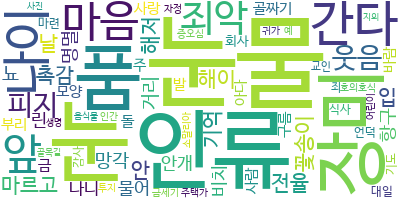

In [26]:
cloud.to_image()

In [27]:
cloud.to_file('negative.png')

## TF-IDF 알고리즘을 활용한 내용이 유사한 시 추천

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from konlpy.tag import Kkma

kkma = Kkma()

In [29]:
two_poems = [df['본문'][0], df['본문'][1]]
tfidfv = TfidfVectorizer().fit(two_poems)
print(tfidfv.transform(two_poems).toarray())
print(tfidfv.vocabulary_)

[[0.         0.07402205 0.07402205 0.         0.07402205 0.07402205
  0.07402205 0.07402205 0.         0.07402205 0.07402205 0.07402205
  0.         0.07402205 0.07402205 0.14804411 0.07402205 0.14804411
  0.07402205 0.07402205 0.14804411 0.         0.07402205 0.29608822
  0.07402205 0.07402205 0.07402205 0.         0.07402205 0.07402205
  0.14804411 0.07402205 0.07402205 0.07402205 0.07402205 0.07402205
  0.14804411 0.07402205 0.07402205 0.         0.07402205 0.14804411
  0.07402205 0.07402205 0.07402205 0.07402205 0.07402205 0.07402205
  0.14804411 0.07402205 0.07402205 0.14804411 0.07402205 0.07402205
  0.07402205 0.07402205 0.07402205 0.         0.07402205 0.07402205
  0.07402205 0.07402205 0.07402205 0.07402205 0.07402205 0.
  0.07402205 0.07402205 0.07402205 0.07402205 0.07402205 0.07402205
  0.22206616 0.07402205 0.07402205 0.07402205 0.07402205 0.07402205
  0.07402205 0.07402205 0.07402205 0.07402205 0.07402205 0.
  0.07402205 0.07402205 0.07402205 0.07402205 0.07402205 0.14804

**{그리운, 그립다, 그리워}가 모두 다른 독립된 단어로 카운트**되는 것으로 보아 동일한 어간을 고려 못한다는 문제가 있다.\
-> 형태소 분석을 통해 유효한 부분만 추출해내고, 명사/형용사 등 분위기를 정하는 유효한 요소만 필터링할 필요가 있음

In [30]:
def sent_words(str2):
    list0 = kkma.pos(str2)
    res = ''
    for i in list0:
        if i[1] in ('NNG', 'NNP', 'VV', 'VA', 'XR'):
            res += str(i[0])
            res += ' '
    return res

In [31]:
sent_words(df['본문'][0])

'내 어리 산골 학교 미술 시간 푸르 크레용 옥토끼 모양 우리나라 지도 그리 안 우거지 단풍잎 맑은 시내 그리 산머루 향이 교실 날아들 오후 사범 학교 졸업 처녀 선생님 그림 보 울 시 가을 산 꽃 피 하 으름 일 가을 나 선생님 눈물 방울 같 단풍잎 맑 시냇물 속 뛰놀 돌 스 눈물 훔치 선생님 뒷모습 쳐다보 충혈 눈동자 잊 없 그리하 단풍잎 지 세월 가 이제 선생 되 내 앞 아이 땀 흘리 그림 그리 똑같 얼굴 똑같 슬픔 푸르 크레용 둘러치 동강 땅 그립 하늘 아이 평상 얼굴 반쪽 땅 위 단풍잎 채우 충혈 눈 아이 보 눈 뜨 모르 살아오 날 가슴 후비 날 손가락 그리 땅 그립 하늘 아래 무엇 채우 손 그린 땅 안 허름 시들 단풍잎 하나 떨구 거부 끝내 잊히 선생님 눈물 되살 동강 낳 눈물 방울 산과 바다 아이 웃 얼굴 뒤덮 '

In [32]:
df['감성단어'] = df['본문'].apply(sent_words)
df.head()

,제목,저자,본문,출처,총길이,행 수,연 수,평균 단어 길이,평균 행 길이,sentiment,positive,neutral,negative,연도,trend_idx,감성단어
0,20년 후의 가을,곽재구,내 어릴 적 산골 학교 미술 시간에\n나는 푸른 크레용으로 옥토끼 모양 우리나라\n...,woorimal,591,28,1,2.654321,20.142857,positive,0.57,0.36,0.07,1984,0.45805,내 어리 산골 학교 미술 시간 푸르 크레용 옥토끼 모양 우리나라 지도 그리 안 우거...
1,5월 화단,오일도,5월의 더딘 해 고요히 내리는 화단.\n하루의 정열도\n파김치 같이 시들다.\n바람...,raincat,95,6,2,2.653846,14.833333,positive,0.53,0.29,0.18,1930,0.06988,더디 해 내리 화단 하루 정열 파김치 시들 바람 아 이파리 하나 흔들 힘 없 어둡 ...
2,5월이 오면,김용호,무언가 속을 흐르는게 있다.\n가느다란 여울이 되어\n흐르는 것.\n\n이윽고 그것...,raincat,194,14,4,3.000000,12.714286,positive,0.53,0.43,0.04,1960,91.40141,무언가 속 흐르 있 가느다랗 여울 되 흐르 흐름 멈추 모이 호수 되 아담 정 부드럽...
3,6월의 시,김남조,어쩌면 미소짓는 물여울처럼 \n부는 바람일까 \n보리가 익어가는 보리밭 언저리에 \...,raincat,279,18,5,2.808824,14.333333,positive,0.54,0.38,0.08,1971,0.75576,미소 짓 물 여울 부 바람 보리 익 갈 보리밭 언저리 고맙 햇빛 기름 인양 하 깊 ...
4,가 정,박목월,지상에는\n아홉 켤레의 신발\n아니 현관에는 아니 들깐에는\n아니 어느 시인의 가정...,woorimal,333,32,4,2.719101,9.343750,positive,0.59,0.35,0.06,1968,2.87181,지상 신발 알 현관 알 드 까 에 알 시인 가정 알 전등 켜지 문수 다르 아홉 켤레...


In [33]:
vectorizer = TfidfVectorizer(min_df=1)
tf_idf_mat = vectorizer.fit_transform(df['감성단어'])
document_distances = (tf_idf_mat*tf_idf_mat.T)
print('유사도 분석을 위한 matrix')
print(document_distances.toarray())

유사도 분석을 위한 matrix
[[1.         0.02226815 0.00352106 ... 0.03472153 0.00817594 0.05642043]
 [0.02226815 1.         0.         ... 0.01626378 0.0723234  0.01998255]
 [0.00352106 0.         1.         ... 0.01095844 0.         0.00388127]
 ...
 [0.03472153 0.01626378 0.01095844 ... 1.         0.03105358 0.00720136]
 [0.00817594 0.0723234  0.         ... 0.03105358 1.         0.03343459]
 [0.05642043 0.01998255 0.00388127 ... 0.00720136 0.03343459 1.        ]]


In [34]:
tfidfmtx = pd.DataFrame(document_distances.toarray())
tfidfmtx

,0,1,2,3,4,5,6,7,8,9,...,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268
0,1.000000,0.022268,0.003521,0.003562,0.015996,0.000000,0.045997,0.006556,0.023739,0.004811,...,0.028091,0.064255,0.023532,0.000000,0.0,0.000000,0.020138,0.034722,0.008176,0.056420
1,0.022268,1.000000,0.000000,0.020282,0.000000,0.000000,0.015059,0.008144,0.005588,0.008621,...,0.000000,0.000000,0.011347,0.062608,0.0,0.013518,0.024039,0.016264,0.072323,0.019983
2,0.003521,0.000000,1.000000,0.021900,0.014154,0.000000,0.000000,0.003447,0.000000,0.017029,...,0.006817,0.000000,0.023233,0.000000,0.0,0.069455,0.007029,0.010958,0.000000,0.003881
3,0.003562,0.020282,0.021900,1.000000,0.049470,0.042941,0.019783,0.002247,0.018864,0.002006,...,0.007894,0.000000,0.000000,0.069120,0.0,0.005189,0.011741,0.025838,0.009249,0.014616
4,0.015996,0.000000,0.014154,0.049470,1.000000,0.000000,0.023178,0.000000,0.000000,0.014275,...,0.010998,0.000000,0.009123,0.000000,0.0,0.000000,0.000000,0.006189,0.000000,0.016291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,0.000000,0.013518,0.069455,0.005189,0.000000,0.000000,0.004902,0.001930,0.014567,0.000000,...,0.003818,0.000000,0.017426,0.010494,0.0,1.000000,0.034251,0.064180,0.011958,0.004321
1265,0.020138,0.024039,0.007029,0.011741,0.000000,0.000000,0.008717,0.014459,0.021003,0.000000,...,0.009950,0.000000,0.008792,0.036243,0.0,0.034251,1.000000,0.005166,0.014586,0.027469
1266,0.034722,0.016264,0.010958,0.025838,0.006189,0.044093,0.027894,0.018771,0.018224,0.018369,...,0.042972,0.000000,0.002318,0.013204,0.0,0.064180,0.005166,1.000000,0.031054,0.007201
1267,0.008176,0.072323,0.000000,0.009249,0.000000,0.048557,0.003224,0.009693,0.072581,0.017426,...,0.028482,0.000000,0.012501,0.006949,0.0,0.011958,0.014586,0.031054,1.000000,0.033435


In [35]:
# 예시로 3개를 뽑아본다
def most_sim_poem(idx):
    sim_idx = np.argsort(tfidfmtx[idx])[1267]
    sim_idx2 = np.argsort(tfidfmtx[idx])[1266]
    sim_idx3 = np.argsort(tfidfmtx[idx])[1265]
    print('선택한 시:', '\n')
    print(df['제목'][idx], '\n', '\t', '\t', df['저자'][idx], '\n')
    print(df['본문'][idx], '\n')
    print('------------------', '\n')
    print('1번째로 유사한 시:', '\n')
    print(df['제목'][sim_idx], '\n', '\t', '\t', df['저자'][sim_idx], '\n')
    print(df['본문'][sim_idx], '\n')
    print('문서 유사도:', tfidfmtx.iloc[sim_idx, idx], '\n')
    print('------------------', '\n')
    print('2번째로 유사한 시:', '\n')
    print(df['제목'][sim_idx2], '\n', '\t', '\t', df['저자'][sim_idx2], '\n')
    print(df['본문'][sim_idx2], '\n')
    print('문서 유사도:', tfidfmtx.iloc[sim_idx2, idx], '\n')
    print('------------------', '\n')
    print('3번째로 유사한 시:', '\n')
    print(df['제목'][sim_idx3], '\n', '\t', '\t', df['저자'][sim_idx3], '\n')
    print(df['본문'][sim_idx3], '\n')
    print('문서 유사도:', tfidfmtx.iloc[sim_idx3, idx])

In [36]:
most_sim_poem(4)

선택한 시: 

가 정 
 	 	 박목월 

지상에는
아홉 켤레의 신발
아니 현관에는 아니 들깐에는
아니 어느 시인의 가정에는
알전등이 켜질 무렵을
문수가 다른 아홉 켤레의 신발을.

내 신발은
십 구문 반
눈과 얼음의 길을 걸어
그들 옆에 벗으면,
육문 삼의 코가 납짝한
귀염둥아 귀염둥아
우리 막내둥아

미소하는
내 얼굴을 보아라
얼음과 눈으로 벽을 짜올린
여기는
지상
연민한 삶의 길이여
내 신발은 십구문 반.

아랫목에 모인
아홉 마리의 강아지야
강아지 같은 것들아
굴욕과 굶주림과 추운 길을 걸어
내가 왔다.
아버지가 왔다.
아니 십구문 반의 신발이 왔다.
아니 지상에는
아버지라는 어설픈 것이
존재한다
미소하는
내 얼굴을 보아라. 

------------------ 

1번째로 유사한 시: 

빈 집 
 	 	 박형준 

개 한 마리
감나무에 묶여
하늘을 본다
까치밥 몇 개가 남아 있다.
새가 쪼아먹는 감은 신발
바람이 신어 보고
달빛이 신어 보고
소리 없이 내려와
불빛 없는 집
등불

겨울밤을
감나무에 묶여 낑낑거리는 개는
앞발로 땅을 파며 김칫독처럼
운다, 울어서
등을 말고 웅크리고 있는 개는
불씨
감나무 가지에 남은 몇 개의 이파리
흔들리며 흔들리며
새처럼 개의 눈에 아른거린다.

주인이 놓고 간
신발들
빈집을 녹인다
긴 겨울밤 

문서 유사도: 0.17407585237086193 

------------------ 

2번째로 유사한 시: 

오감도 시제2호 
 	 	 이상 

나의아버지가나의겨테서조을적에나는나의아버지가되고또나는
나의아버지의아버지가되고그런데도나의아버지는나의아버지대
로나의아버지인데어쩌자고나는작고나의아버지의아버지의아버
지의……아버지가되니나는웨나의아버지를껑충뛰어넘어야하는
지나는웨드듸어나와나의아버지와나의아버지의아버지와나의아
버지의아버지의아버지노릇을한꺼번에하면서살아야하는것이냐 

문서 유사도: 0.1500829865169577 

------------------ 

3번째로 유사한 시: 

아버지의 마음 
 	 	 김현승 

바쁜 사람들

## Euclidean Distance 기반으로 유사한 시 추천하기

In [37]:
import warnings
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings(action='ignore')

### Z-score standardization

In [38]:
macro = df[['총길이', '연 수', '행 수', '평균 행 길이', '평균 단어 길이']]
macro_df = pd.DataFrame(StandardScaler().fit_transform(macro), columns=macro.columns)

sentiment = df[['positive', 'neutral', 'negative']]
sentiment_df = pd.DataFrame(StandardScaler().fit_transform(sentiment), columns=sentiment.columns)

context = df[['연도', 'trend_idx']]
context_df = pd.DataFrame(StandardScaler().fit_transform(context), columns=context.columns)

In [39]:
macro_df

,총길이,연 수,행 수,평균 행 길이,평균 단어 길이
0,1.582884,-0.922139,1.268564,-0.056781,-0.097665
1,-0.721442,-0.495994,-0.782027,-0.199242,-0.097795
2,-0.261506,0.356296,-0.036358,-0.256099,-0.002842
3,0.133389,0.782441,0.336477,-0.212658,-0.055283
4,0.384263,0.356296,1.641398,-0.346535,-0.079895
...,...,...,...,...,...
1264,0.054410,-0.069849,0.336477,-0.235018,-0.031501
1265,0.007952,0.782441,-0.036358,-0.146857,0.001582
1266,2.581735,-0.922139,3.225946,-0.182176,-0.035812
1267,0.179847,0.356296,0.336477,-0.196261,-0.115994


In [40]:
sentiment_df

,positive,neutral,negative
0,0.362125,-0.318989,-0.104160
1,0.083364,-0.788124,2.520346
2,0.083364,0.150147,-0.819935
3,0.153055,-0.184950,0.134431
4,0.501505,-0.386008,-0.342752
...,...,...,...
1264,0.571195,-0.453028,-0.342752
1265,0.571195,-0.453028,-0.342752
1266,0.640885,-0.453028,-0.581343
1267,-1.798268,1.691592,0.134431


In [41]:
context_df

,연도,trend_idx
0,1.164743,-0.398353
1,-0.878604,-0.418537
2,0.256589,4.330500
3,0.672826,-0.382872
4,0.559307,-0.272842
...,...,...
1264,0.332268,-0.392378
1265,-0.575886,-0.374063
1266,0.975544,3.120172
1267,-0.348848,0.635205


In [42]:
for col in macro_df.columns:
    df["{}_scaled".format(col)] = macro_df[col]
for col in sentiment_df.columns:
    df["{}_scaled".format(col)] = sentiment_df[col]
for col in context_df.columns:
    df["{}_scaled".format(col)] = context_df[col]
df

,제목,저자,본문,출처,총길이,행 수,연 수,평균 단어 길이,평균 행 길이,sentiment,...,총길이_scaled,연 수_scaled,행 수_scaled,평균 행 길이_scaled,평균 단어 길이_scaled,positive_scaled,neutral_scaled,negative_scaled,연도_scaled,trend_idx_scaled
0,20년 후의 가을,곽재구,내 어릴 적 산골 학교 미술 시간에\n나는 푸른 크레용으로 옥토끼 모양 우리나라\n...,woorimal,591,28,1,2.654321,20.142857,positive,...,1.582884,-0.922139,1.268564,-0.056781,-0.097665,0.362125,-0.318989,-0.104160,1.164743,-0.398353
1,5월 화단,오일도,5월의 더딘 해 고요히 내리는 화단.\n하루의 정열도\n파김치 같이 시들다.\n바람...,raincat,95,6,2,2.653846,14.833333,positive,...,-0.721442,-0.495994,-0.782027,-0.199242,-0.097795,0.083364,-0.788124,2.520346,-0.878604,-0.418537
2,5월이 오면,김용호,무언가 속을 흐르는게 있다.\n가느다란 여울이 되어\n흐르는 것.\n\n이윽고 그것...,raincat,194,14,4,3.000000,12.714286,positive,...,-0.261506,0.356296,-0.036358,-0.256099,-0.002842,0.083364,0.150147,-0.819935,0.256589,4.330500
3,6월의 시,김남조,어쩌면 미소짓는 물여울처럼 \n부는 바람일까 \n보리가 익어가는 보리밭 언저리에 \...,raincat,279,18,5,2.808824,14.333333,positive,...,0.133389,0.782441,0.336477,-0.212658,-0.055283,0.153055,-0.184950,0.134431,0.672826,-0.382872
4,가 정,박목월,지상에는\n아홉 켤레의 신발\n아니 현관에는 아니 들깐에는\n아니 어느 시인의 가정...,woorimal,333,32,4,2.719101,9.343750,positive,...,0.384263,0.356296,1.641398,-0.346535,-0.079895,0.501505,-0.386008,-0.342752,0.559307,-0.272842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,흥부 부부상,박재삼,흥부 부부가 박덩이를 사이 하고\n가르기 전에 건넨 웃음살을 헤아려 보라.\n금이 ...,woorimal,262,18,3,2.895522,13.500000,positive,...,0.054410,-0.069849,0.336477,-0.235018,-0.031501,0.571195,-0.453028,-0.342752,0.332268,-0.392378
1265,희망,노천명,꽃술이 바람에 고개짓하고\n숲들 사뭇 우짖습니다\n\n그대가 오신다는 기별만 같아\...,raincat,252,14,5,3.016129,16.785714,positive,...,0.007952,0.782441,-0.036358,-0.146857,0.001582,0.571195,-0.453028,-0.342752,-0.575886,-0.374063
1266,희미한 옛사랑의 그림자,김광규,4 · 19가 나던 해 세밑\n우리는 오후 다섯 시에 만나\n반갑게 악수를 나누고\...,woorimal,806,49,1,2.879808,15.469388,positive,...,2.581735,-0.922139,3.225946,-0.182176,-0.035812,0.640885,-0.453028,-0.581343,0.975544,3.120172
1267,흰 그림자,윤동주,황혼이 짙어지는 길 모금에서\n하루 종일 시들은 귀를 가만히 기울이면\n땅 검의 옮...,raincat,289,18,4,2.587500,14.944444,neutral,...,0.179847,0.356296,0.336477,-0.196261,-0.115994,-1.798268,1.691592,0.134431,-0.348848,0.635205


### 사용자 입력을 통한 시 추천
사용자 input = 제목, 저자, 추천 기준, 저자 중복 허용 여부

*추천 기준: macro / sentiment / context / all   
*저자 중복 허용 여부: True일 경우 해당 저자의 작품을 제외하고 추천, False일 경우 포함하여 추천

In [43]:
def calculate_distance(title, author, col_list, feature_type, drop_duplicate_author):
    res = df.copy()
    poem = res[res["제목"]==title][res["저자"]==author]
    if drop_duplicate_author:
        print("중복 작가를 제외하고 추천합니다\n\n")
        res = res.drop(res[res["저자"]==author].index)
        res = res.reset_index(drop=True)
    res["distance"+feature_type] = float(0.0)
    for idx in range(len(res)):
        row = res[idx:idx+1]
        for col in col_list:
            col = col + "_scaled"
            res["distance"+feature_type][idx] += (float(poem[col]) - float(row[col]))**2
    return res.sort_values("distance" + feature_type, ascending=[True])

### 시의 구조 기반 추천

In [44]:
res_macro = calculate_distance("가 정", "박목월", list(macro.columns), "_Macro", True)
res_macro[["제목", "저자", "본문"] + list(macro.columns) + ["distance_Macro"]][:10]

중복 작가를 제외하고 추천합니다




,제목,저자,본문,총길이,연 수,행 수,평균 행 길이,평균 단어 길이,distance_Macro
317,능금,김춘수,Ⅰ\n그는 그리움에 산다.\n그리움은 익어서\n스스로도 견디기 어려운\n빛깔이 되고...,337,3,32,9.500000,2.612903,0.182811
749,손,최석두,안개 자욱한 이른 새벽\n채 눈이 뜨이기도 전에 손이 왔다\n손은 수염이 검숭검숭\...,404,4,29,12.862069,2.621622,0.196620
634,사랑의 말,김남조,1\n사랑은 \n말 하지 않는 말\n아침에 단잠을 깨우듯\n눈부셔 못견딘\n사랑 하...,261,4,29,8.214286,2.378378,0.199734
830,어떤 그림,김남조,하얀 도화지에\n노란 새장 그려져 있다\n새장문 열려 있어\n푸른 하늘 긴 허리띠가...,304,5,32,8.406250,2.675000,0.200530
1171,하느님의 동화,김남조,절망이 이리도 아름다운가 \n홍해에까지 쫓긴 모세는 \n황홀한 어질머리로 바다를 본...,353,4,27,12.000000,2.779070,0.231180
1126,파 도,김현승,"아, 여기 누가\n술 위에 술을 부었나.\n잇발로 깨무는\n흰 거품 부글부글 넘치는...",351,4,26,12.423077,2.597938,0.327687
21,가을에,정한모,"맑은 햇빛으로 반짝반짝 물들으며\n가볍게 가을을 날으고 있는\n나뭇잎,\n그렇게 주...",424,5,33,11.757576,2.862385,0.374761
348,답십리,민영,하나\n땅거미 지면\n거나해서 돌아온다.\n양 어깨 축 늘어진\n빨래가 되어.\n새...,359,3,37,8.675676,2.808511,0.414309
111,광야,김남조,오늘 이미 저물녘이니 \n나의 삶 지극민망하다 \n시를 이루고저 했으되 \n뜻과 말...,435,5,33,12.090909,3.000000,0.426214
357,대숲 아래서,나태주,1.\n바람은 구름을 몰고\n구름은 생각을 몰고\n다시 생각은 대숲을 몰고\n대숲 ...,419,5,29,13.344828,2.617391,0.431726


### 시의 분위기 기반 추천

In [45]:
res_sentiment = calculate_distance("가 정", "박목월", list(sentiment.columns), "_Sentiment", True)
res_sentiment[["제목", "저자", "본문"] + list(sentiment.columns) + [col+"_scaled" for col in list(sentiment.columns)] + ["distance_Sentiment"]][:10]

중복 작가를 제외하고 추천합니다




,제목,저자,본문,positive,neutral,negative,positive_scaled,neutral_scaled,negative_scaled,distance_Sentiment
754,수색으로 가며,고형렬,나는 매일 밤 수색으로 가는데 수색은 보이지 않는다.\n모래내를 지나 '수색' 표지...,0.59,0.35,0.06,0.501505,-0.386008,-0.342752,0.0
314,눈이여! 어서 내려다오,오일도,눈이여! 어서 내려다오.\n저 황막한 벌판을 희게 덮게 하오.\n\n차디찬 서리의 ...,0.59,0.35,0.06,0.501505,-0.386008,-0.342752,0.0
298,누른 포도잎,오일도,검젖은 뜰 위에\n하나 둘....\n말없이 내리는 누른 포도잎.\n\n오늘도 나는 ...,0.59,0.35,0.06,0.501505,-0.386008,-0.342752,0.0
484,바다에서,김종길,차운 물보라가\n이마를 적실 때마다\n나는 소년처럼 울음을 참았다.\n\n길길이 부...,0.59,0.35,0.06,0.501505,-0.386008,-0.342752,0.0
510,발효,최승호,부패해 가는 마음 안의 거대한 저수지를\n나는 발효시키려 한다.\n\n나는 충분히 ...,0.59,0.35,0.06,0.501505,-0.386008,-0.342752,0.0
534,벼는 벼끼리 피는 피끼리,하종오,우리야 우리끼리 하는 말로\n태어나면서도 넓디넓은\n평야 이루기 위해 태어났제.\n...,0.59,0.35,0.06,0.501505,-0.386008,-0.342752,0.0
1069,처음 안 일,박두순,지하철 보도 계단 맨바닥에\n손 내밀고 엎드린\n거지 아저씨\n손이 텅 비어 있었다...,0.59,0.35,0.06,0.501505,-0.386008,-0.342752,0.0
243,낙화,한용운,떨어진 꽃이 힘없이 대지의 품에 안길 때\n애처로운 남은 향기가 어디로 가는 줄을 ...,0.59,0.35,0.06,0.501505,-0.386008,-0.342752,0.0
1077,청개구리,백기만,청개구리는 장마 때에 운다. 차디찬 비 맞은 나뭇잎에서\n하늘을 원망하듯 치어다보며...,0.59,0.35,0.06,0.501505,-0.386008,-0.342752,0.0
219,나무와 마음,이은상,나무도 사람처럼 마음이 있소\n숨쉬고 뜻있고 정도 있지요\n만지고 쓸어주면 춤을 추...,0.59,0.35,0.06,0.501505,-0.386008,-0.342752,0.0


### 시의 정보 기반 추천

In [46]:
res_macro = calculate_distance("가 정", "박목월", list(macro.columns), "_Macro", True)
res_macro[["제목", "저자", "본문"] + list(macro.columns) + ["distance_Macro"]][:10]

중복 작가를 제외하고 추천합니다




,제목,저자,본문,총길이,연 수,행 수,평균 행 길이,평균 단어 길이,distance_Macro
317,능금,김춘수,Ⅰ\n그는 그리움에 산다.\n그리움은 익어서\n스스로도 견디기 어려운\n빛깔이 되고...,337,3,32,9.500000,2.612903,0.182811
749,손,최석두,안개 자욱한 이른 새벽\n채 눈이 뜨이기도 전에 손이 왔다\n손은 수염이 검숭검숭\...,404,4,29,12.862069,2.621622,0.196620
634,사랑의 말,김남조,1\n사랑은 \n말 하지 않는 말\n아침에 단잠을 깨우듯\n눈부셔 못견딘\n사랑 하...,261,4,29,8.214286,2.378378,0.199734
830,어떤 그림,김남조,하얀 도화지에\n노란 새장 그려져 있다\n새장문 열려 있어\n푸른 하늘 긴 허리띠가...,304,5,32,8.406250,2.675000,0.200530
1171,하느님의 동화,김남조,절망이 이리도 아름다운가 \n홍해에까지 쫓긴 모세는 \n황홀한 어질머리로 바다를 본...,353,4,27,12.000000,2.779070,0.231180
1126,파 도,김현승,"아, 여기 누가\n술 위에 술을 부었나.\n잇발로 깨무는\n흰 거품 부글부글 넘치는...",351,4,26,12.423077,2.597938,0.327687
21,가을에,정한모,"맑은 햇빛으로 반짝반짝 물들으며\n가볍게 가을을 날으고 있는\n나뭇잎,\n그렇게 주...",424,5,33,11.757576,2.862385,0.374761
348,답십리,민영,하나\n땅거미 지면\n거나해서 돌아온다.\n양 어깨 축 늘어진\n빨래가 되어.\n새...,359,3,37,8.675676,2.808511,0.414309
111,광야,김남조,오늘 이미 저물녘이니 \n나의 삶 지극민망하다 \n시를 이루고저 했으되 \n뜻과 말...,435,5,33,12.090909,3.000000,0.426214
357,대숲 아래서,나태주,1.\n바람은 구름을 몰고\n구름은 생각을 몰고\n다시 생각은 대숲을 몰고\n대숲 ...,419,5,29,13.344828,2.617391,0.431726


### 종합 추천

In [47]:
res_all = calculate_distance("가 정", "박목월", list(sentiment.columns)+list(macro.columns)+list(context.columns), "_All", True)
res_all[["제목", "저자", "본문"] + ["distance_All"]][:10]

중복 작가를 제외하고 추천합니다




,제목,저자,본문,distance_All
317,능금,김춘수,Ⅰ\n그는 그리움에 산다.\n그리움은 익어서\n스스로도 견디기 어려운\n빛깔이 되고...,0.380409
1171,하느님의 동화,김남조,절망이 이리도 아름다운가 \n홍해에까지 쫓긴 모세는 \n황홀한 어질머리로 바다를 본...,0.522217
749,손,최석두,안개 자욱한 이른 새벽\n채 눈이 뜨이기도 전에 손이 왔다\n손은 수염이 검숭검숭\...,0.558653
348,답십리,민영,하나\n땅거미 지면\n거나해서 돌아온다.\n양 어깨 축 늘어진\n빨래가 되어.\n새...,0.597194
499,바람춤,신석초,언제나 내 더렵히지 않을\n티 없는 꽃잎으로 살어여러 했건만\n내 가슴의 그윽한 수...,0.835331
1234,흙 한 줌 이슬 한 방울,김현승,온 세계는\n황금으로 굳고 무쇠로 녹슨 땅\n봄비가 내려도 스며들지 않고\n새 소리...,0.840257
729,설일,김남조,겨울 나무와\n바람\n머리채 긴 바람들은 투명한 빨래처럼\n진종일 가지 끝에 걸려\...,0.862361
516,밤 편지,김남조,편지를 쓰게 해다오\n\n이날의 할 말을 마치고\n늙도록 거르지 않는 \n독백의 연...,0.925501
491,바라춤 -서장-,신석초,언제나 내 더럽히지 않을\n티없는 꽃잎으로 살어 여려 했건만\n내 가슴의 그윽한 수...,0.951925
1195,해마다 봄이 되면,조병화,"해마다 봄이 되면\n어린 시절 그분의 말씀\n항상 봄처럼 부지런해라.\n땅 속에서,...",0.962301
